In [26]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

prioritycalls = gpd.read_file('/Users/erikrobertsson/Documents/dataplus/dpdshapefilelatlong/dpdshapefilelatlong.shp')
prioritycalls = prioritycalls.loc[~(prioritycalls["X"] == 0) & ~(prioritycalls["Y"] == 0) & ~(prioritycalls["Cancelled"] != 0)].copy()
prioritycalls = prioritycalls.loc[prioritycalls["Source"] != "Self Initiated"]
prioritycalls = prioritycalls.loc[prioritycalls["Beat"] != "DSO"]
priorprioritycalls = prioritycalls.loc[~(prioritycalls["Priority"] != "P")].copy()

print(prioritycalls.shape) 
prioritycalls.head(6)

(122783, 15)


,Event Numb,Case Numbe,Call Date,Call Time,Source,Priority,Nature,Address,X,Y,District,Beat,Dispositio,Cancelled,geometry
0,21000002,None,1/1/2021,12:00:28AM,Wireless 911 Call,3,SOUND OF SHOTS,100 PEBBLESTONE DR,2055372,818537,D1,121,Resolved Without Report,0,POINT (-78.81280 35.99886)
1,21000006,None,1/1/2021,12:01:41AM,Wireless 911 Call,3,SOUND OF SHOTS,CARROLL ST/MOREHEAD AVE,2024961,815902,D3,312,Resolved Without Report,0,POINT (-78.91562 35.99174)
2,21000007,None,1/1/2021,12:01:45AM,Wireless 911 Call,3,SOUND OF SHOTS,1300 SHILEY DR,2038061,841530,D2,223,Resolved Without Report,0,POINT (-78.87123 36.06210)
3,21000008,None,1/1/2021,12:02:10AM,Wireless 911 Call,3,SOUND OF SHOTS,0 EDGEBROOK CIR,2045947,796806,D4,414,Resolved Without Report,0,POINT (-78.84478 35.93921)
4,21000010,None,1/1/2021,12:02:39AM,Wireless 911 Call,3,SOUND OF SHOTS,1200 ALMA ST,2037016,818259,D1,112,Resolved Without Report,0,POINT (-78.87486 35.99818)
5,21000011,None,1/1/2021,12:04:08AM,Wireless 911 Call,3,SUSPICIOUS PERSON,100 LANDSBURY DR,2007390,806379,D3,321,Resolved Without Report,0,POINT (-78.97502 35.96561)


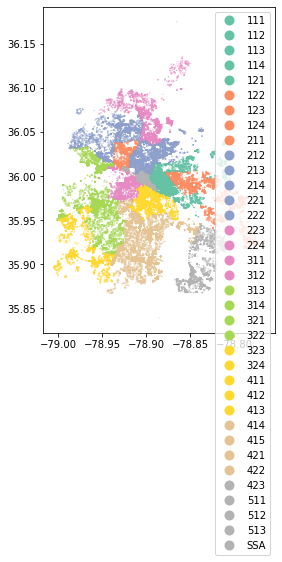

In [28]:
prioritycalls.plot(column='Beat', 
                         categorical=True, 
                         legend=True, 
                         figsize=(10,6),
                         markersize=0.05, 
                         cmap="Set2", aspect=1);

In [29]:
onlyppriorities = pd.DataFrame(priorprioritycalls.groupby("Beat").agg({'Event Numb':'count'}))
onlyppriorities.rename(columns=({'Event Numb':'Count_of_Pcalls'}),inplace = True)
onlyppriorities.head()

,Count_of_Pcalls
Beat,
111,236
112,216
113,274
114,192
121,209


In [7]:
allpriorities = pd.DataFrame(prioritycalls.groupby("Beat").agg({'Event Numb':'count'}))
allpriorities.rename(columns=({'Event Numb':'Count_of_calls'}),inplace = True)
allpriorities.head()

,Count_of_calls
Beat,
111,2730
112,2662
113,3095
114,3059
121,2812


In [8]:
# prioritycalls['Pcall'] = np.where(prioritycalls['Priority']!= '[P]', True, False)
# prioritycalls.groupby('Beat')['Beat']
# prioritycalls['propofpcalls']= prioritycalls['Pcall']
# prioritycalls.head()

In [30]:
bothtypes = pd.concat([allpriorities, onlyppriorities], axis = 1)
bothtypes.sort_values(by='Count_of_Pcalls', inplace=True, ascending=False)
bothtypes.head(6)

,Count_of_calls,Count_of_Pcalls
Beat,,
223,5371,437.0
421,4679,388.0
411,3926,374.0
423,5895,364.0
422,4647,355.0
221,4274,342.0


In [31]:
bothtypes['propofpcalls']= bothtypes['Count_of_Pcalls'] / bothtypes['Count_of_calls']
bothtypes.sort_values(by='propofpcalls', inplace=True, ascending=False)
bothtypes.head(6)

,Count_of_calls,Count_of_Pcalls,propofpcalls
Beat,,,
411,3926,374.0,0.095262
113,3095,274.0,0.088530
122,3494,303.0,0.086720
111,2730,236.0,0.086447
421,4679,388.0,0.082924
223,5371,437.0,0.081363
